In [66]:
# Importing the dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score,confusion_matrix
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

In [67]:
# Data Collection and Processing
#loading the csv data to a Pandas Dataframe
heart_data = pd.read_csv("data/Heart_Disease_Prediction.csv")

In [68]:
#Print first 5 rows of the dataset
heart_data.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
3,65,1,4,120,177,0,0,140,0,0.4,1,0,7,0
4,56,1,3,130,256,1,2,142,1,0.6,2,1,6,1


In [69]:
#Print last 5 rows of the dataset
heart_data.tail()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0
269,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1


In [70]:
# Number of rows and columns in the dataset
heart_data.shape

(270, 14)

In [71]:
#getting some information about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    int64  
dtypes: float64(1), int64(13)
m

In [72]:
# checking for missing values
heart_data.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [73]:
# Statistical measures about the data
heart_data.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,1.000000


In [74]:
# checking the distribution of Target variable
heart_data['Heart Disease'].value_counts()
# 1  --> Defective Heart
# 0  --> Healthy Heart

0    150
1    120
Name: Heart Disease, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

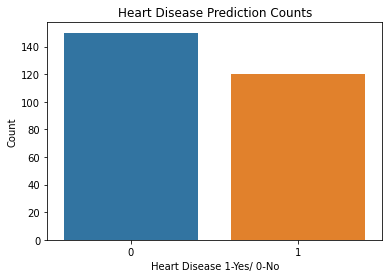

In [75]:
heart_disease_counts = heart_data['Heart Disease'].value_counts()
sns.barplot(x=heart_disease_counts.index,y=heart_disease_counts.values)
plt.title('Heart Disease Prediction Counts')
plt.xlabel('Heart Disease 1-Yes/ 0-No')
plt.ylabel('Count')
plt.show

In [76]:
# splitting the features and target
X = heart_data.drop(columns='Heart Disease',axis=1)
Y = heart_data['Heart Disease']

In [77]:
print(X)

     Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0     70    1                4  130          322             0            2   
1     67    0                3  115          564             0            2   
2     74    0                2  120          269             0            2   
3     65    1                4  120          177             0            0   
4     56    1                3  130          256             1            2   
..   ...  ...              ...  ...          ...           ...          ...   
265   52    1                3  172          199             1            0   
266   44    1                2  120          263             0            0   
267   56    0                2  140          294             0            2   
268   57    1                4  140          192             0            0   
269   67    1                4  160          286             0            2   

     Max HR  Exercise angina  ST depression  Slope 

In [78]:
print(Y)

0      1
1      0
2      0
3      0
4      1
      ..
265    0
266    0
267    0
268    0
269    1
Name: Heart Disease, Length: 270, dtype: int64


In [79]:
# checking the distribution of Feature variable
X['Sex'].value_counts()

1    183
0     87
Name: Sex, dtype: int64

In [80]:
# checking the distribution of Feature variable
X['Chest pain type'].value_counts()

4    129
3     79
2     42
1     20
Name: Chest pain type, dtype: int64

In [81]:
X['FBS over 120'].value_counts()

0    230
1     40
Name: FBS over 120, dtype: int64

In [82]:
X['EKG results'].value_counts()

2    137
0    131
1      2
Name: EKG results, dtype: int64

In [83]:
X['Exercise angina'].value_counts()

0    181
1     89
Name: Exercise angina, dtype: int64

In [84]:
X['Slope of ST'].value_counts()

1    130
2    122
3     18
Name: Slope of ST, dtype: int64

In [85]:
X['Number of vessels fluro'].value_counts()

0    160
1     58
2     33
3     19
Name: Number of vessels fluro, dtype: int64

In [86]:
X['Thallium'].value_counts()

3    152
7    104
6     14
Name: Thallium, dtype: int64

In [87]:
X = heart_data.drop(columns='Heart Disease',axis=1)
Y = heart_data['Heart Disease']
def model_all_features(modelname):
    kf = KFold(n_splits=5)
    if modelname=='Logistic':
        print("Logistic Regression Model")
        model = LogisticRegression(max_iter=10000)
    elif modelname == 'RF':
        print("Random Forest Model")
        model = RandomForestClassifier()
    elif modelname == 'ExtraTrees':
        print("Extra Trees Model")
        model = ExtraTreeClassifier()
    elif modelname == 'AdaBoost':
        print("Adaboost Model")
        model = AdaBoostClassifier()
    elif modelname == 'SVM':
        print("SVM Model")
        model = SVC(kernel='rbf')
    elif modelname == 'Scaled SVM':
        print("Scaled SVM Model")
        model = SVC(kernel='rbf')

    accuracies,precision,recall,f1score = [],[],[],[]
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = Y[train_index], Y[test_index]

        if modelname == 'Scaled SVM':
            sc = StandardScaler()
            X_train = sc.fit_transform(X_train)
            X_test = sc.transform(X_test)

        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        predictions = model.predict(X_test)

    accuracies.append(accuracy_score(y_test, predictions))
    precision.append(precision_score(y_test, predictions, average='macro'))
    recall.append(recall_score(y_test, predictions, average='macro'))
    f1score.append(f1_score(y_test, predictions, average='macro'))
    average_accuracy = np.mean(accuracies)
    print("Average Accuracy of "+modelname +" Model", average_accuracy)
    average_precision = np.mean(precision)
    print("Average Precision of "+modelname +" Model", average_precision)
    average_recall = np.mean(recall)
    print("Average Recall of "+modelname +" Model", average_recall)
    average_f1score = np.mean(f1score)
    print("Average F1 Score of "+modelname +" Model", average_f1score)

In [88]:
model_all_features("Logistic")

Logistic Regression Model
Average Accuracy of Logistic Model 0.8888888888888888
Average Precision of Logistic Model 0.901470588235294
Average Recall of Logistic Model 0.8791666666666667
Average F1 Score of Logistic Model 0.8849431818181818


In [89]:
model_all_features("RF")

Random Forest Model
Average Accuracy of RF Model 0.8888888888888888
Average Precision of RF Model 0.8920454545454546
Average Recall of RF Model 0.8833333333333333
Average F1 Score of RF Model 0.8863955119214586


In [90]:
model_all_features('ExtraTrees')

Extra Trees Model
Average Accuracy of ExtraTrees Model 0.6296296296296297
Average Precision of ExtraTrees Model 0.6235294117647059
Average Recall of ExtraTrees Model 0.6166666666666667
Average F1 Score of ExtraTrees Model 0.6164772727272727


In [91]:
model_all_features('AdaBoost')

Adaboost Model
Average Accuracy of AdaBoost Model 0.8888888888888888
Average Precision of AdaBoost Model 0.901470588235294
Average Recall of AdaBoost Model 0.8791666666666667
Average F1 Score of AdaBoost Model 0.8849431818181818


In [92]:
model_all_features('SVM')

SVM Model
Average Accuracy of SVM Model 0.6481481481481481
Average Precision of SVM Model 0.6632270168855534
Average Recall of SVM Model 0.6208333333333333
Average F1 Score of SVM Model 0.6094404263418348


In [93]:
model_all_features('Scaled SVM')

Scaled SVM Model
Average Accuracy of Scaled SVM Model 0.8333333333333334
Average Precision of Scaled SVM Model 0.832398316970547
Average Recall of Scaled SVM Model 0.8291666666666666
Average F1 Score of Scaled SVM Model 0.8304848273456575


In [94]:
X = heart_data.drop(columns='Heart Disease',axis=1)
Y = heart_data['Heart Disease']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model = RandomForestClassifier()
model.fit(X_train,y_train)

predictions = model.predict(X_test)
print(confusion_matrix(y_test,predictions))

[[25  5]
 [ 6 18]]


Precision of Random Forest Model  0.782608695652174
Recall of Random Forest Model  0.75
F1 Score of Random Forest Model  0.7659574468085107
Accuracy of Random Forest Model  0.7962962962962963


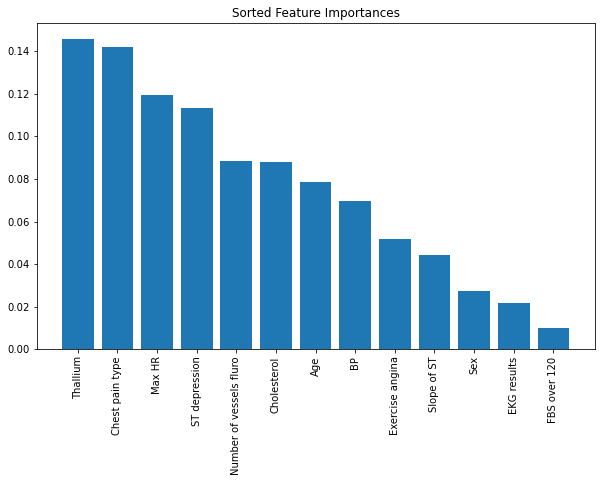

In [95]:
print("Precision of Random Forest Model ",precision_score(y_test,predictions))
print("Recall of Random Forest Model ",recall_score(y_test,predictions))
print("F1 Score of Random Forest Model ",f1_score(y_test,predictions))
print("Accuracy of Random Forest Model ",accuracy_score(y_test,predictions))
importances = model.feature_importances_
feature_importances = zip(X_train.columns, importances)
sorted_feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)
df_feature_importances = pd.DataFrame(sorted_feature_importances, columns=['Feature', 'Importance'])
plt.figure(figsize=(10, 6))
plt.title("Sorted Feature Importances")
plt.bar(df_feature_importances['Feature'], df_feature_importances['Importance'])
plt.xticks(rotation=90)
plt.show()

In [96]:
correlation_matrix=pd.DataFrame(heart_data.corr()[['Heart Disease']]).sort_values(by='Heart Disease',ascending=False).fillna(0).reset_index().rename(columns={'index':'Features','Heart Disease':'Correlation_Score'})

In [97]:
filtered=correlation_matrix[correlation_matrix['Correlation_Score']!=0]

In [98]:
positive=filtered[filtered['Correlation_Score']>0.1]['Features'].tolist()

In [99]:
negative=filtered[filtered['Correlation_Score']<-0.2]['Features'].tolist()

In [100]:
heart_data2=pd.concat([heart_data[positive],heart_data[negative]],axis=1)

In [101]:
heart_data2.columns

Index(['Heart Disease', 'Thallium', 'Number of vessels fluro',
       'Exercise angina', 'ST depression', 'Chest pain type', 'Slope of ST',
       'Sex', 'Age', 'EKG results', 'BP', 'Cholesterol', 'Max HR'],
      dtype='object')

In [102]:
X = heart_data2.copy()
Y = X.pop('Heart Disease')

In [103]:
def model(modelname):
    kf = KFold(n_splits=5)
    if modelname=='Logistic':
        print("Logistic Regression Model")
        model = LogisticRegression(max_iter=10000)
    elif modelname == 'RF':
        print("Random Forest Model")
        model = RandomForestClassifier()
    elif modelname == 'ExtraTrees':
        print("Extra Trees Model")
        model = ExtraTreeClassifier()
    elif modelname == 'AdaBoost':
        print("Adaboost Model")
        model = AdaBoostClassifier()
    elif modelname == 'SVM':
        print("SVM Model")
        model = SVC(kernel='rbf')
    elif modelname == 'Scaled SVM':
        print("Scaled SVM Model")
        model = SVC(kernel='rbf')

    accuracies,precision,recall,f1score = [],[],[],[]
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = Y[train_index], Y[test_index]

        if modelname == 'Scaled SVM':
            sc = StandardScaler()
            X_train = sc.fit_transform(X_train)
            X_test = sc.transform(X_test)

        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        predictions = model.predict(X_test)

    accuracies.append(accuracy_score(y_test, predictions))
    precision.append(precision_score(y_test, predictions, average='macro'))
    recall.append(recall_score(y_test, predictions, average='macro'))
    f1score.append(f1_score(y_test, predictions, average='macro'))
    average_accuracy = np.mean(accuracies)
    print("Average Accuracy of "+modelname +" Model", average_accuracy)
    average_precision = np.mean(precision)
    print("Average Precision of "+modelname +" Model", average_precision)
    average_recall = np.mean(recall)
    print("Average Recall of "+modelname +" Model", average_recall)
    average_f1score = np.mean(f1score)
    print("Average F1 Score of "+modelname +" Model", average_f1score)

In [104]:
model("Logistic")

Logistic Regression Model
Average Accuracy of Logistic Model 0.8703703703703703
Average Precision of Logistic Model 0.8766233766233766
Average Recall of Logistic Model 0.8625
Average F1 Score of Logistic Model 0.8666666666666667


In [105]:
model("RF")

Random Forest Model
Average Accuracy of RF Model 0.8703703703703703
Average Precision of RF Model 0.8702664796633941
Average Recall of RF Model 0.8666666666666667
Average F1 Score of RF Model 0.8681548657132891


In [106]:
model("ExtraTrees")

Extra Trees Model
Average Accuracy of ExtraTrees Model 0.6666666666666666
Average Precision of ExtraTrees Model 0.6648351648351649
Average Recall of ExtraTrees Model 0.6666666666666666
Average F1 Score of ExtraTrees Model 0.6648275862068965


In [107]:
model("AdaBoost")

Adaboost Model
Average Accuracy of AdaBoost Model 0.8888888888888888
Average Precision of AdaBoost Model 0.8920454545454546
Average Recall of AdaBoost Model 0.8833333333333333
Average F1 Score of AdaBoost Model 0.8863955119214586


In [108]:
model("SVM")

SVM Model
Average Accuracy of SVM Model 0.6666666666666666
Average Precision of SVM Model 0.6821428571428572
Average Recall of SVM Model 0.6416666666666667
Average F1 Score of SVM Model 0.6345864661654135


In [109]:
model("Scaled SVM")

Scaled SVM Model
Average Accuracy of Scaled SVM Model 0.8518518518518519
Average Precision of Scaled SVM Model 0.8536931818181819
Average Recall of Scaled SVM Model 0.8458333333333333
Average F1 Score of Scaled SVM Model 0.8485273492286116


In [110]:
#Feature Importance of Random Forest Model
X = heart_data2.copy()
Y = X.pop('Heart Disease')
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train,y_train)

predictions = model.predict(X_test)
print(confusion_matrix(y_test,predictions))

[[25  5]
 [ 6 18]]


Precision of Random Forest Model  0.782608695652174
Recall of Random Forest Model  0.75
F1 Score of Random Forest Model  0.7659574468085107
Accuracy of Random Forest Model  0.7962962962962963


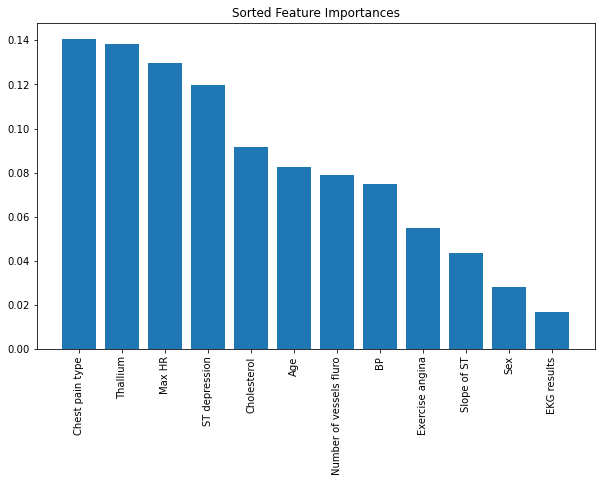

In [111]:
print("Precision of Random Forest Model ",precision_score(y_test,predictions))
print("Recall of Random Forest Model ",recall_score(y_test,predictions))
print("F1 Score of Random Forest Model ",f1_score(y_test,predictions))
print("Accuracy of Random Forest Model ",accuracy_score(y_test,predictions))
importances = model.feature_importances_
feature_importances = zip(X_train.columns, importances)
sorted_feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)
df_feature_importances = pd.DataFrame(sorted_feature_importances, columns=['Feature', 'Importance'])
plt.figure(figsize=(10, 6))
plt.title("Sorted Feature Importances")
plt.bar(df_feature_importances['Feature'], df_feature_importances['Importance'])
plt.xticks(rotation=90)
plt.show()

In [112]:
#Saving the Trained Model
import pickle
filename ='trained_model.sav'
pickle.dump(model, open(filename,'wb'))

In [113]:
#loading the saved model 
loaded_model = pickle.load(open('trained_model.sav','rb'))

In [127]:
input_data = (48,1,2,130,245,2,180,0,0.2,2,0,3)

#change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the numpy array as we are predicting for only an instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if(prediction[0] == 0):
    print('The Person has a Healthy Heart')
else : 
    print('The Person has Heart Disease')

[1]
The Person has Heart Disease
